# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [13]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data:
data = pd.read_csv('../data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [32]:
# there are 2 categorial data: 'Channel' and 'Region'
## Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal) 
## Region - Lisbon, Oporto or Other (Nominal) 

# The other columns are annual spending in million units

data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [6]:
# Your code here:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
data.shape

(440, 8)

In [15]:
# There aren't any missing data to remove
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [12]:
data.describe().T.sort_values(by='50%', ascending=False)

count          mean           std   min      25%     50%  \
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Delicassen        440.0   1524.870455   2820.105937   3.0   408.25   965.5   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Region            440.0      2.543182      0.774272   1.0     2.00     3.0   
Channel           440.0      1.322727      0.468052   1.0     1.00     1.0   

                       75%       max  
Fresh             16933.75  112151.0  
Grocery           10655.75   92780.0  
Milk               7190.25   73498.0  
Frozen             3554.25   60869.0  
Delicassen         1820.25   47943.0  
Detergents_Paper   3922.00   40827.0  
Region                3.00       3.0  
Channel               2.00       2.0

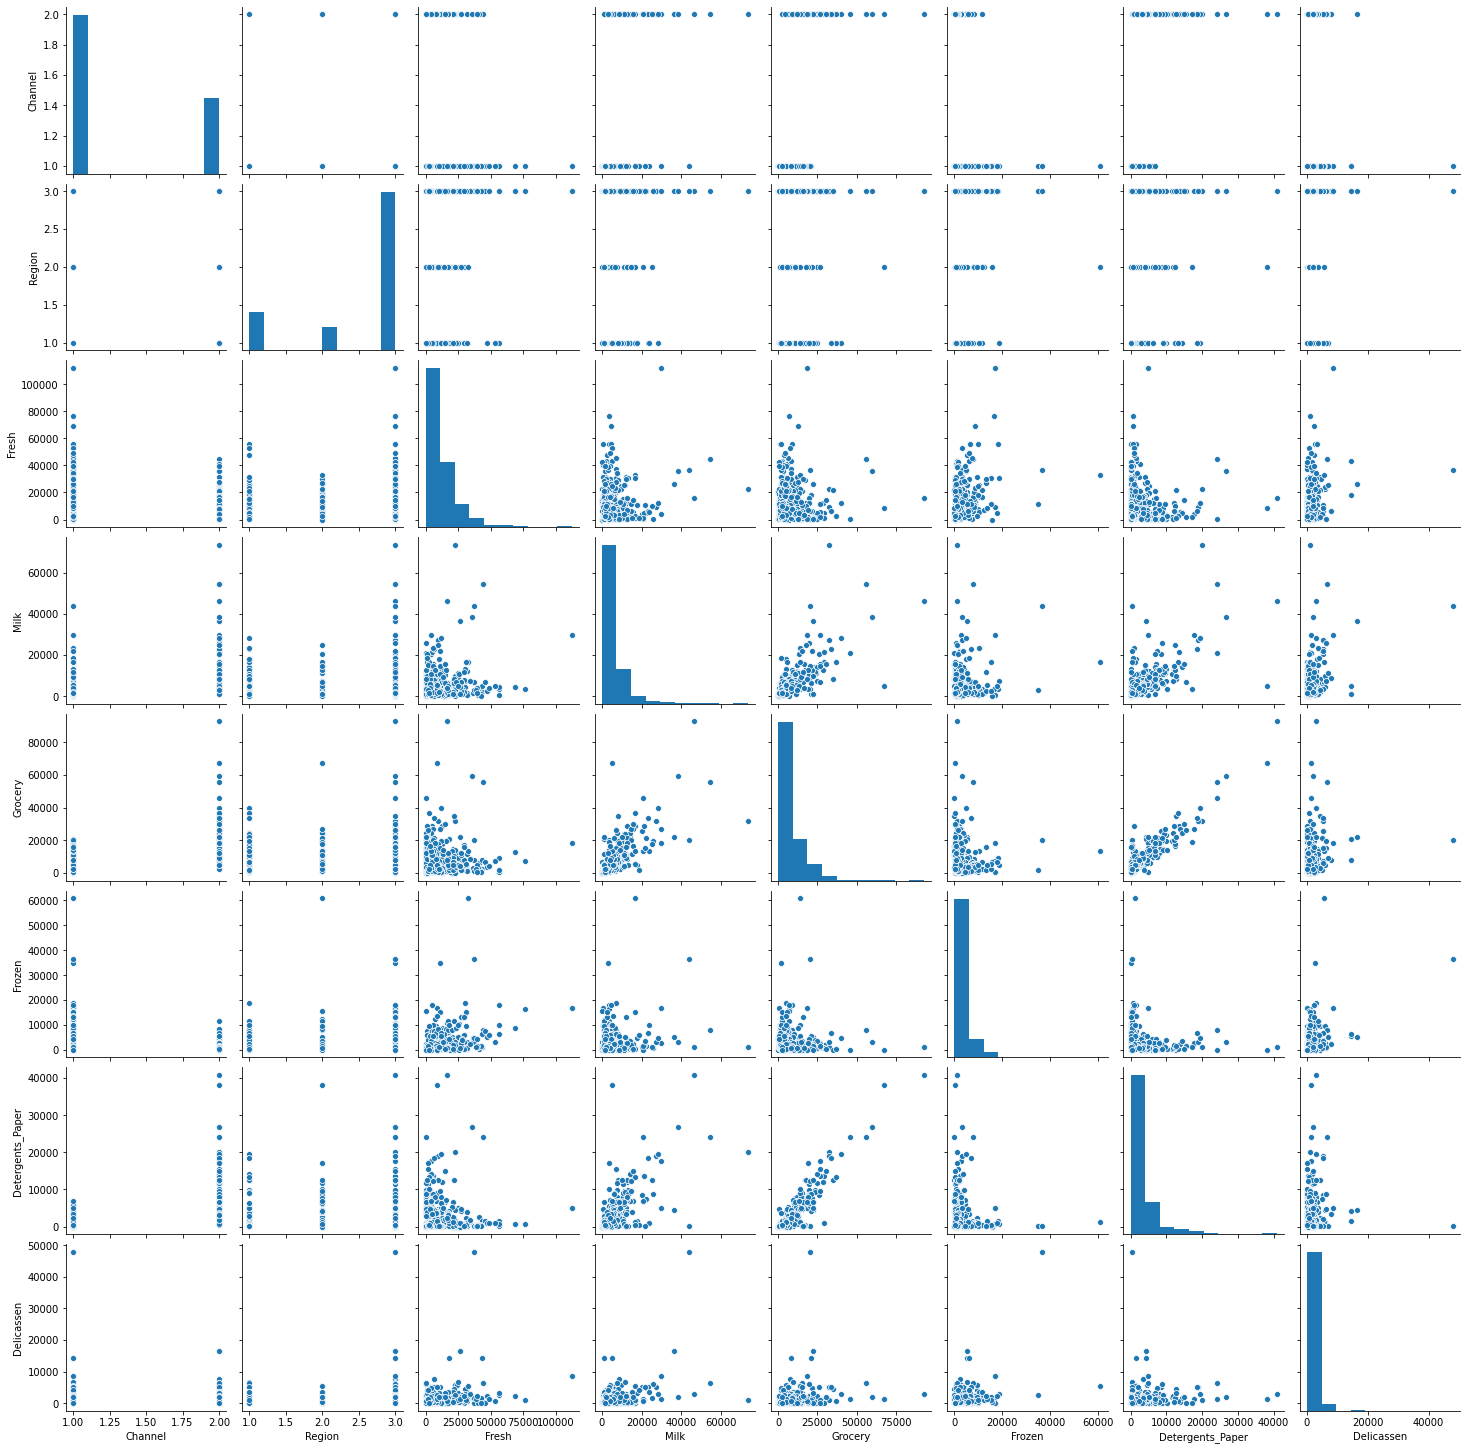

In [17]:
# Column collinearity - there seems to have some correlations between "Grocery" and "Detergents_Paper"
# the distribution of all numeric values is super skewed to the right.

## HORECA channel and Lisbon Region are predominant 
sns.pairplot(data)

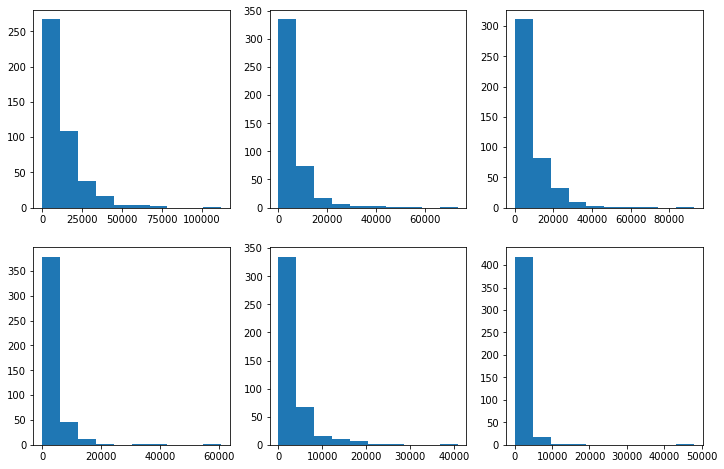

In [31]:

fig, ax = plt.subplots(2,3, figsize=(12,8))
ax[0,0].hist(data.Fresh)
ax[0,1].hist(data.Milk)
ax[0,2].hist(data.Grocery)
ax[1,0].hist(data.Frozen)
ax[1,1].hist(data.Detergents_Paper)
ax[1,2].hist(data.Delicassen);

In [ ]:
# Any outliers to remove?

In [41]:
## FIRST, NORMALIZE ALL DATA: 

In [33]:
from scipy import stats

Text(0.5, 1.0, 'Probplot after Box-Cox transformation')

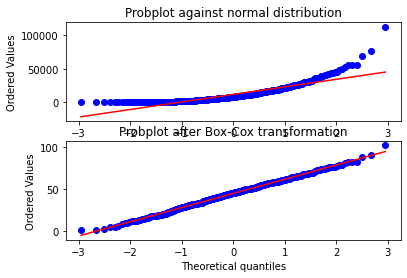

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = data.Fresh
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

In [39]:
t_fresh = stats.boxcox(data.Fresh)
t_milk = stats.boxcox(data.Milk)
t_grocery = stats.boxcox(data.Grocery)
t_frozen = stats.boxcox(data.Frozen)
t_detergents_Paper = stats.boxcox(data.Detergents_Paper)
t_delicassen = stats.boxcox(data.Delicassen)

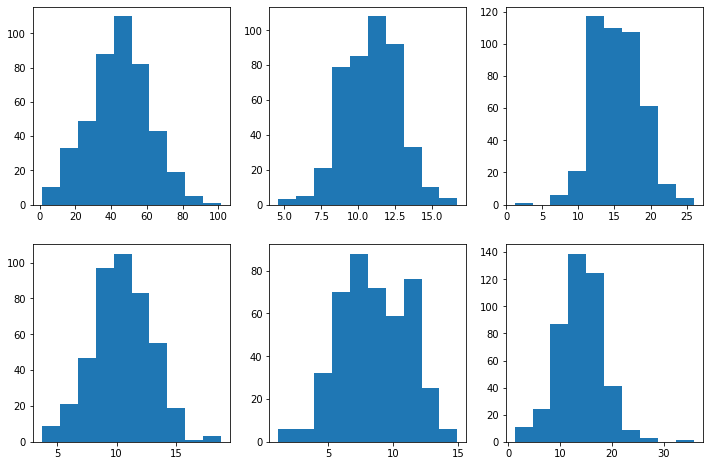

In [65]:
fig, ax = plt.subplots(2,3, figsize=(12,8))
ax[0,0].hist(t_fresh[0])
ax[0,1].hist(t_milk[0])
ax[0,2].hist(t_grocery[0])
ax[1,0].hist(t_frozen[0])
ax[1,1].hist(t_detergents_Paper[0])
ax[1,2].hist(t_delicassen[0]);

In [69]:
t_df = pd.DataFrame([t_fresh[0], t_milk[0], t_grocery[0], t_frozen[0], t_detergents_Paper[0], t_delicassen[0]]).T
t_df.columns= ['fresh', 'milk', 'grocery', 'frozen', 'detergents_Paper', 'delicassen']

In [70]:
t_df.head()

fresh       milk    grocery     frozen  detergents_Paper  delicassen
0  51.736919  12.670296  16.694342   6.887991         10.154313   15.470232
1  42.989031  12.699553  17.444169  10.638490         10.494584   16.620941
2  41.571828  12.500943  16.745021  11.254315         10.602565   23.790243
3  52.490385   9.068054  14.932092  13.308825          7.587652   16.649068
4  62.025081  11.620137  16.540472  12.253988          9.499037   21.583731

In [72]:
t_df.describe().T

count       mean        std       min        25%        50%  \
fresh             440.0  44.845742  16.718993  1.297776  33.082657  45.615090   
milk              440.0  10.856013   1.854735  4.596233   9.470306  10.918724   
grocery           440.0  15.434100   3.210891  1.179625  13.054012  15.281914   
frozen            440.0  10.443894   2.443837  3.730425   9.014500  10.359550   
detergents_Paper  440.0   8.555818   2.592704  1.136529   6.610681   8.296571   
delicassen        440.0  14.007201   4.362090  1.222366  11.270068  14.219307   

                        75%         max  
fresh             56.668564  101.573143  
milk              12.130722   16.688053  
grocery           17.794722   25.969330  
frozen            12.052169   18.774933  
detergents_Paper  10.783593   14.972315  
delicassen        16.723910   35.778584

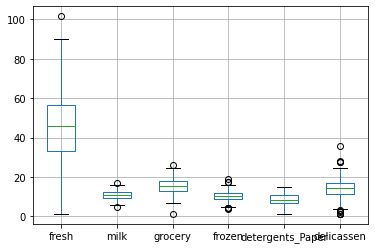

In [82]:
t_df.boxplot()

In [84]:
# UPPER OUTLIER CUT
t_df.describe().T['50%'] + 1.5 * (t_df.describe().T['75%'] - t_df.describe().T['25%'])

fresh               80.993950
milk                14.909347
grocery             22.392979
frozen              14.916053
detergents_Paper    14.555939
delicassen          22.400070
dtype: float64

In [83]:
# LOWER OUTLIER CUT: There are no lower outliers
t_df.describe().T['50%'] - 1.5 * (t_df.describe().T['75%'] - t_df.describe().T['25%'])

fresh               10.236229
milk                 6.928101
grocery              8.170849
frozen               5.803046
detergents_Paper     2.037203
delicassen           6.038544
dtype: float64

In [87]:
t_df.shape

(440, 6)

In [86]:
# Your observations here

## There are outliers but it's better not to drop them yet, since there are different categories of customers

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [ ]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [ ]:
# Your code here:


Count the values in `labels`.

In [ ]:
# Your code here:


# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [ ]:
# Your code here


Count the values in `labels_DBSCAN`.

In [ ]:
# Your code here


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Your code here:


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here